# Population Studies at 75 Years

## A scientometric review in honour of the journal's 75th birthday

Last updated: 2021-08-12

By Melinda C. Mills and Charles Rahal

### 1. Preamble

Lets first load in some functions we've created for analysis:

In [1]:
import os
import nltk
import pandas as pd
from popstudies_preprocessor import build_datasets, load_curated, make_stopwords
from popstudies_analysis import (make_word_vis, make_author_table,
                                 make_affil_plot, describe_lengths,
                                 summarize_scrape_and_curate,
                                 gender_over_time, gender_over_time_oneplot,
                                 headline_topics, uncited_ratios,
                                 make_mwc, make_mf_topics,
                                 plot_G, plot_G0_and_G1,
                                 plot_all_G, title_analysis, 
                                 make_network, authorship_per_paper,
                                 authorship_country, network_summary,
                                 simple_continental_analysis, split_continental_analysis,
                                 keyword_tabulation,
                                 open_access_analysis,
                                 describe_norms, visualise_mallet,
                                 uncited_papers)
from popstudies_lda import make_lda_model, make_mallet_model
import matplotlib
%load_ext autoreload
%autoreload 2

And then define a couple of key I\O paths and load in some of key datasets\representations.

In [2]:
stop = make_stopwords()
d_path = os.path.abspath(os.path.join('..', 'data'))
figure_path = os.path.abspath(os.path.join('..', 'article',
                                           'figures'))
main_df, ref_df, auth_df = build_datasets(d_path)
G, Gcc, authors_df, author_papers = make_network(auth_df)
#make_lda_model(main_df, d_path, stop)

There are 267 names we dont know about before calling genderize...
814 genderize calls remaining...!
After calling the genderize API, there are still 67 names which we dont know about!...


### 2. Basic summary statistics

Lets look at some basic descriptives of our cache of papers and authors:

In [3]:
summarize_scrape_and_curate(main_df, auth_df, ref_df, G, Gcc, d_path)

Total number of papers in our main database: 1901
Total number of papers in our author database: 1900
Papers with no abstract: 185
In our main dataframe there are 1858 Articles.
In our main dataframe there are 5 Editorials.
In our main dataframe there are 19 Erratums.
In our main dataframe there are 2 Letters.
In our main dataframe there are 6 Notes.
In our main dataframe there are 11 Reviews.
Total number of authorships: 3267
Total number of unique authors: 2027
Average number of references per paper: 24.76801683324566
Average number of authors per paper: 1.719
The most number of refrences in one paper: 311 (DOI: 10.1080/00324720600646410)
Date of first article: 1947-01-01
Date of most recent article: 2020-09-01
Average paper length (pages): 15.44390243902439
Number of OpenAccess articles: 52
The average number of citations is: 22.354550236717518
The maximum number of citations is: 732(10.1080/713779060)
Number of papers with no citations: 189
Percent of inter-affiliation collaboratio

### 3. Visualisations and more indepth analysis

#### 3.1 Describe the lengths of the articles over time:

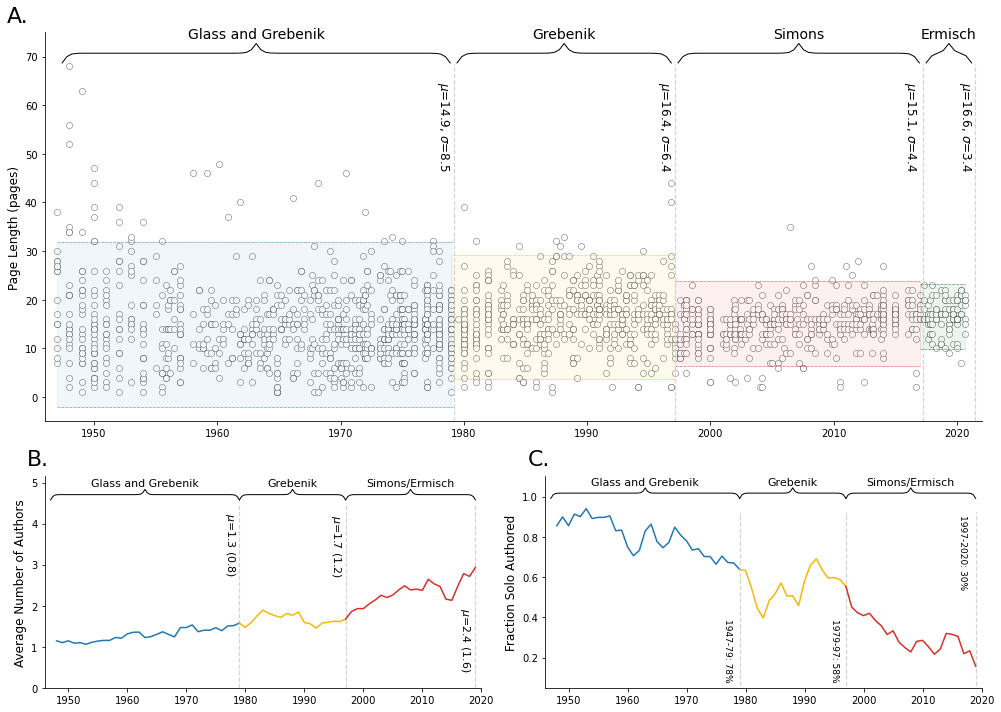

In [4]:
describe_norms(main_df, auth_df)

In [5]:
title_analysis(main_df)

Mean length of titles: 75.33140452393476 characters
Max length of titles: 216 characters
Min length of titles: 5 characters
The shortest title is: Notes
The longest title is: A note on: The joint effect of maternal malnutrition and cold weather on neonatal mortality in nineteenthcentury venice: An assessment of the hypothermia hypothesis, population studies 63(3): 233-251 by renzo derosas
Mean length of titles, first half of period: 65.24947368421053 characters
Mean length of titles, second half of period: 85.40273396424816 characters


#### 3.2 Word Frequencies:

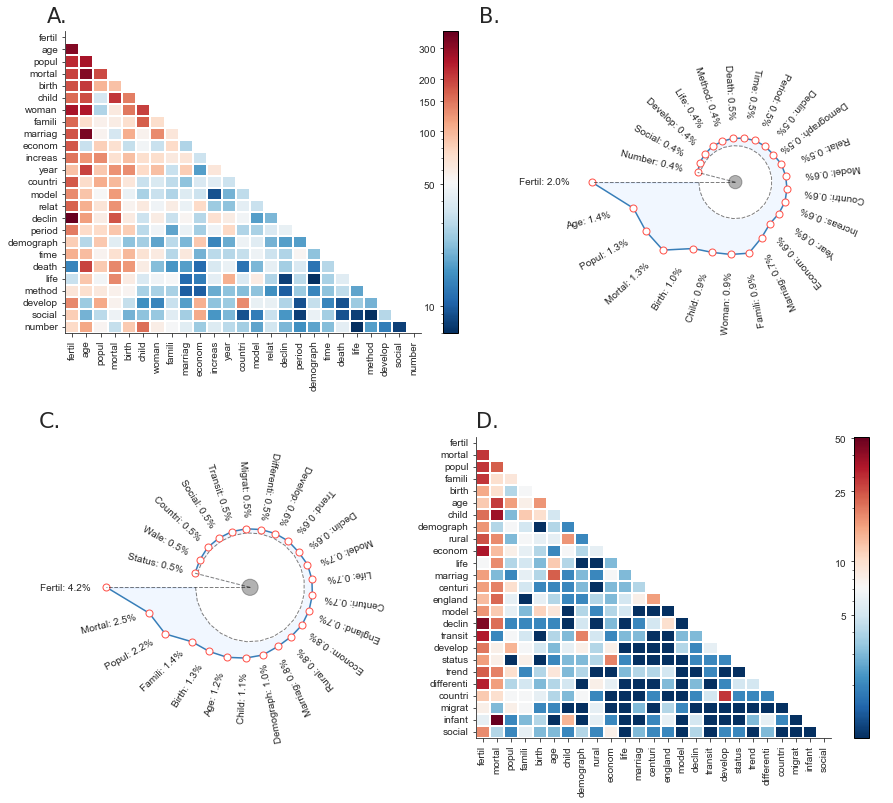

In [6]:
make_word_vis(main_df, figure_path, d_path)

And now something for keywords:

In [7]:
keyword_tabulation(main_df)

We have keywords for 398 papers
We have a total of 2591 keywords

The top 10 keywords are:
keyword
fertility                83
mortality                46
education                25
china                    23
marriage                 23
historical demography    22
migration                19
infant mortality         18
life expectancy          17
ageing                   16
Name: keyword, dtype: int64


#### 3.3 Authorship

In [8]:
authorship_per_paper(auth_df)

Average number of authors per paper in the 1940s: 1.145
Average number of authors per paper in the 1950s: 1.139
Average number of authors per paper in the 1960s: 1.28
Average number of authors per paper in the 1970s: 1.48
Average number of authors per paper in the 1980s: 1.724
Average number of authors per paper in the 1990s: 1.648
Average number of authors per paper in the 2000s: 2.213
Average number of authors per paper in the 2010s: 2.468
The most number of authors on one paper: 18 (DOI: 10.1080/00324728.2019.1595099)
The number of solo authored papers: 1106
The number of papers with 2 authors is : 454
The number of papers with 3 authors is : 211
The number of papers with more than 3 authors is : 129
Percent of solo authored papers in the 1940s: 0.855
Percent of solo authored papers in the 1950s: 0.887
Percent of solo authored papers in the 1960s: 0.8
Percent of solo authored papers in the 1970s: 0.699
Percent of solo authored papers in the 1980s: 0.509
Percent of solo authored pape

Who are the most prolific\influential authors in our dataset?

In [9]:
make_author_table(auth_df, main_df, d_path, 'Papers')

                     Papers  Cites  H-Index  HM-Index First  Last
fullname                                                         
John C. Caldwell         20   1351       13        12  1963  2004
Robert G. Potter         20    294        9         6  1956  1986
John E. Knodel           15    620       11        10  1967  2000
D. V. Glass              15     78        5         5  1950  1971
Samuel H. Preston        14   1204       11        11  1974  2016
Ronald F. Freedman       13    258       10         6  1954  1990
Michael J. Murphy        12    383       11         9  1985  2016
John N. Hobcraft         11    644        8         7  1982  2006
Alberto Palloni          11    204        7         6  1975  2009
John P.M. Bongaarts      11    424        9         9  1976  2019


In [10]:
make_author_table(auth_df, main_df, d_path, 'Cites')

                   Papers  Cites  H-Index  HM-Index First  Last
fullname                                                       
John C. Caldwell       20   1351       13        12  1963  2004
Samuel H. Preston      14   1204       11        11  1974  2016
Larry L. Bumpass        5    801        4         4  1982  2000
Hsien Hen Lu            1    732        1         1  2000  2000
John G.F. Cleland       7    686        6         6  1987  2003
Chris Wilson            6    677        6         6  1981  1999
Thomas McKeown          6    649        5         5  1955  1978
John N. Hobcraft       11    644        8         7  1982  2006
John E. Knodel         15    620       11        10  1967  2000
R. G. Record            3    504        3         3  1962  1975


In [11]:
make_author_table(auth_df, main_df, d_path, 'H-Index')

                     Papers  Cites  H-Index  HM-Index First  Last
fullname                                                         
John C. Caldwell         20   1351       13        12  1963  2004
John E. Knodel           15    620       11        10  1967  2000
Samuel H. Preston        14   1204       11        11  1974  2016
Michael J. Murphy        12    383       11         9  1985  2016
Ronald F. Freedman       13    258       10         6  1954  1990
John P.M. Bongaarts      11    424        9         9  1976  2019
Robert G. Potter         20    294        9         6  1956  1986
James Trussell           10    405        9         7  1977  1996
John N. Hobcraft         11    644        8         7  1982  2006
Dov Friedlander           8    219        8         6  1966  2002


In [12]:
make_author_table(auth_df, main_df, d_path, 'HM-Index')

                     Papers  Cites  H-Index  HM-Index First  Last
fullname                                                         
John C. Caldwell         20   1351       13        12  1963  2004
Samuel H. Preston        14   1204       11        11  1974  2016
John E. Knodel           15    620       11        10  1967  2000
John P.M. Bongaarts      11    424        9         9  1976  2019
Michael J. Murphy        12    383       11         9  1985  2016
Mead T. Cain              7    250        7         7  1982  1991
Robert I. Woods           7    366        7         7  1983  2005
Gigi Santow               9    358        7         7  1979  1998
James Trussell           10    405        9         7  1977  1996
Henri Léridon             9    306        7         7  1969  2008


What do we know about the authors as a whole?

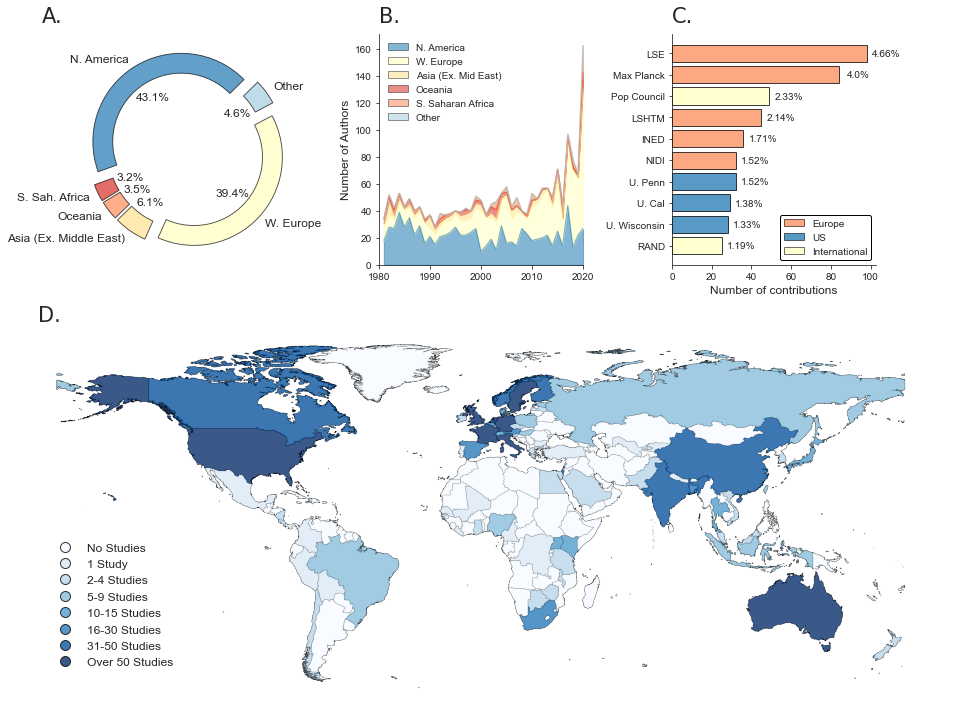

In [13]:
make_affil_plot(main_df, auth_df, d_path, figure_path)

In [14]:
authorship_country(auth_df, d_path)

Number of unique countries from which authors write from: 73

These are: United States (935), United Kingdom (343), Netherlands (115), Germany (86), Australia (76), Sweden (60), France (55), Italy (53), Canada (41), Finland (40), Israel (38), China (36), India (33), Norway (31), Austria (28), Spain (24), Belgium (22), Bangladesh (18), South Africa (17), Switzerland (15), Uganda (14), Denmark (13), Kenya (11), Thailand (11), Japan (10), Brazil (8), Estonia (8), Indonesia (7), Hungary (7), Nigeria (7), Poland (6), Singapore (6), Taiwan (5), Russian Federation (5), New Zealand (4), Zimbabwe (4), Czech Republic (4), Greece (4), Lebanon (3), Viet Nam (3), Malaysia (3), Tanzania (3), Chile (3), Swaziland (3), Slovenia (3), Ghana (3), Saudi Arabia (2), Botswana (2), Costa Rica (2), South Korea (2), Egypt (2), Latvia (2), Malawi (2), Pakistan (2), Haiti (2), Nicaragua (2), Ireland (2), Gambia (1), Cameroon (1), Uzbekistan (1), Bolivia (1), Mali (1), Bulgaria (1), Turkey (1), Colombia (1), Mexi

#### 3.4 Authorship gender

Lets look at authorship gender over time:

                  pc_guess_fem_10  pc_detect_fem_10
pc_guess_fem_10          1.000000          0.964411
pc_detect_fem_10         0.964411          1.000000
The max of Gender Detector is: 0.44623655913978494
The min of Gender Detector is: 0.1523809523809524
The max of Gender Guesser is: 0.4606741573033708
The min of Gender Guesser is: 0.18828451882845187
Percent of female authorships (full sample): 33.47%


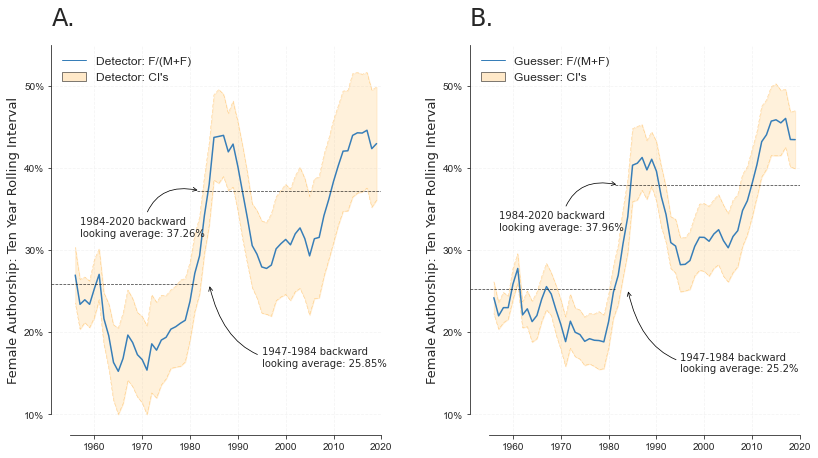

In [15]:
gender_over_time(auth_df[auth_df['forename']!='NAN'])

     pc_clean_fem_1 pc_clean_unknown_1 pc_clean_fem_3 pc_clean_unknown_3  \
2020            NaN                NaN            NaN                NaN   
2019       0.480769           0.037037       0.421569           0.014423   
2018       0.292308                0.0        0.40201           0.009901   
2017       0.482759           0.011236       0.395939           0.019802   
2016       0.404255           0.020833       0.350649           0.043478   
...             ...                ...            ...                ...   
1951           0.25           0.111111       0.186047           0.044444   
1950       0.136364                0.0       0.170732           0.046512   
1949       0.230769           0.071429       0.222222           0.068966   
1948       0.166667           0.142857            NaN                NaN   
1947           0.25                0.0            NaN                NaN   

     pc_clean_fem_5 pc_clean_unknown_5 pc_clean_fem_10 pc_clean_unknown_10  \
2020     

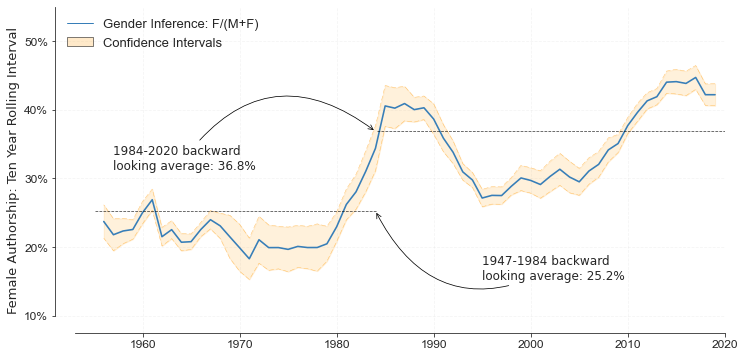

In [16]:
gender_over_time_oneplot(auth_df[auth_df['forename']!='NAN'])

#### 3.5 Topics Studied

Lets now look at the topics studied, first over time:

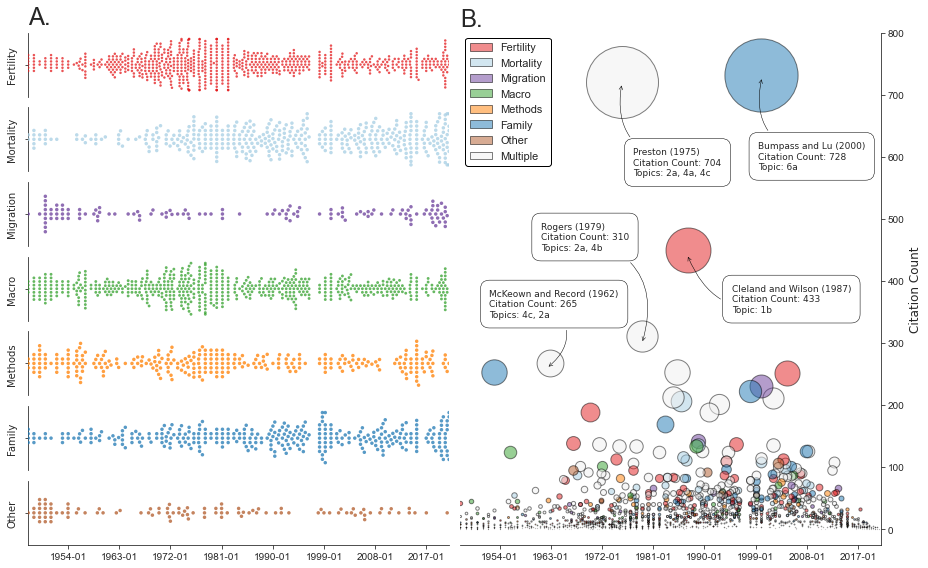

In [17]:
headline_topics(main_df)

and now decompose it into what apers focus on men, women or children:

      DOI Date prismcoverdate citedbycount Topic  \
0     NaN  NaN            NaN          NaN    2a   
1     NaN  NaN            NaN          NaN    2c   
2     NaN  NaN            NaN          NaN     7   
3     NaN  NaN            NaN          NaN    6b   
4     NaN  NaN            NaN          NaN    2a   
...   ...  ...            ...          ...   ...   
2705  NaN  NaN            NaN          NaN    4c   
2706  NaN  NaN            NaN          NaN    1b   
2707  NaN  NaN            NaN          NaN     5   
2708  NaN  NaN            NaN          NaN     5   
2709  NaN  NaN            NaN          NaN    1b   

                                               abstract  
0     Mortality statistics based on underlying cause...  
1     In spite of the vast importance of weather sho...  
2     In spite of the vast importance of weather sho...  
3     Do different operationalizations of family str...  
4     Do different operationalizations of family str...  
...                        

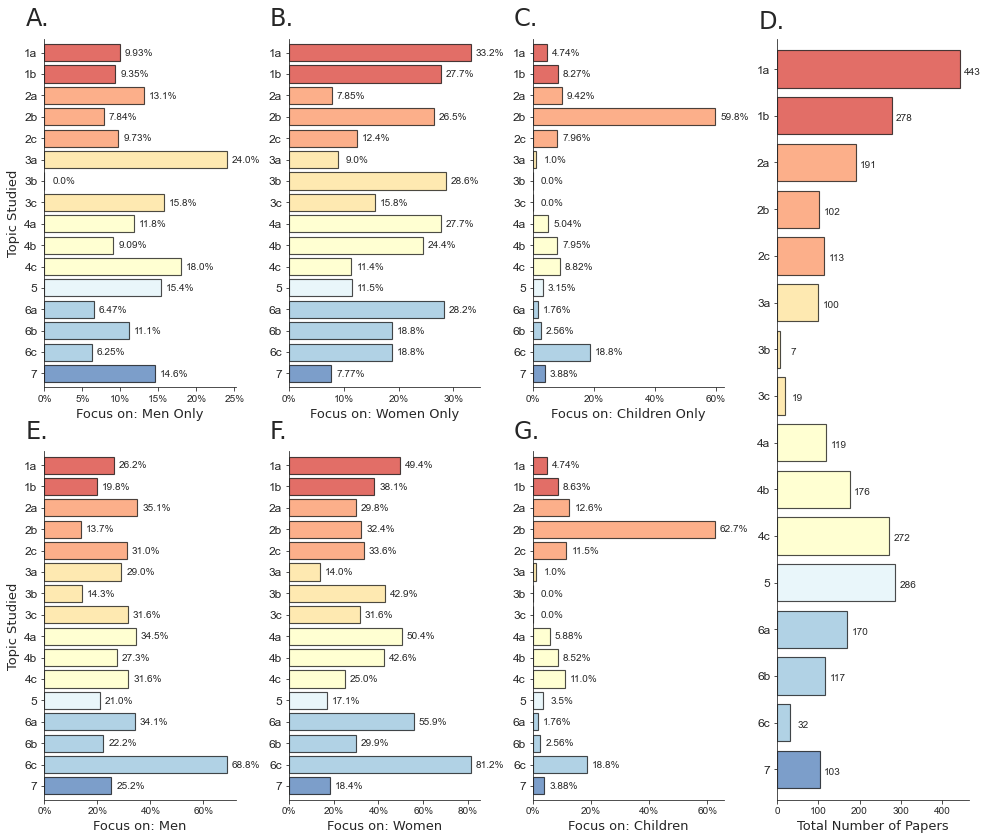

In [18]:
make_mwc(main_df, 'full')

In [19]:
make_mwc(main_df.sort_values(by='prismcoverdate', ascending=True)[0:int(len(main_df)/2)], 'firsthalf')

      DOI Date prismcoverdate citedbycount Topic  \
0     NaN  NaN            NaN          NaN    1b   
1     NaN  NaN            NaN          NaN    3b   
2     NaN  NaN            NaN          NaN    1a   
3     NaN  NaN            NaN          NaN    1b   
4     NaN  NaN            NaN          NaN    6a   
...   ...  ...            ...          ...   ...   
1321  NaN  NaN            NaN          NaN    1b   
1322  NaN  NaN            NaN          NaN     5   
1323  NaN  NaN            NaN          NaN    1b   
1324  NaN  NaN            NaN          NaN    4c   
1325  NaN  NaN            NaN          NaN    1b   

                                               abstract  
0     The startling recovery of the birth-rate in co...  
1     At the beginning of the 1930's Sweden had one ...  
2     This concludes the study, the first part of wh...  
3     It has been known for some time that male and ...  
4     It has been known for some time that male and ...  
...                        

In [20]:
make_mwc(main_df.sort_values(by='prismcoverdate', ascending=True)[int(len(main_df)/2):], 'secondhalf')

      DOI Date prismcoverdate citedbycount Topic  \
0     NaN  NaN            NaN          NaN    1a   
1     NaN  NaN            NaN          NaN    1a   
2     NaN  NaN            NaN          NaN    1a   
3     NaN  NaN            NaN          NaN    1a   
4     NaN  NaN            NaN          NaN    1a   
...   ...  ...            ...          ...   ...   
1379  NaN  NaN            NaN          NaN    6b   
1380  NaN  NaN            NaN          NaN    2a   
1381  NaN  NaN            NaN          NaN    2c   
1382  NaN  NaN            NaN          NaN     7   
1383  NaN  NaN            NaN          NaN    2a   

                                               abstract  
0     Two aspects of the family in relation to ferti...  
1     In this paper the relationship between the use...  
2     This paper evaluates the evidence for the exis...  
3     What characteristics differentiate between men...  
4     We use Demeny and Shorterâs method, and some...  
...                        

What about authorship across topics?

In [21]:
make_mf_topics(auth_df[auth_df['forename']!='NAN'], main_df, d_path)

   Topic_M Subtopics_M Topic_F Subtopics_F Topic_Ratio Subtopics_Ratio
1a     590         345     283         198        2.08            1.74
1b                 245                  85                        2.88
2a     380         171     224          77         1.7            2.22
2b                  85                  54                        1.57
2c                 124                  93                        1.33
3a     106          84      62          51        1.71            1.65
3b                   7                   4                        1.75
3c                  15                   7                        2.14
4a     435         104     213          63        2.04            1.65
4b                 149                  93                         1.6
4c                 182                  57                        3.19
5a     231         231      69          69        3.35            3.35
6a     259         127     200          87         1.3            1.46
6b    

#### 3.6 Populations Studied

What nations are the being being studied coming from?

In [22]:
main_df.groupby(['Nation'])['Nation'].count().sort_values(ascending=False)[:10]

Nation
United States     108
China              79
England; Wales     61
India              60
United Kingdom     54
England            43
Sweden             35
Bangladesh         31
Australia          24
Finland            22
Name: Nation, dtype: int64

Lets break this down into continents with some manual merging

In [23]:
print('We have continent data for: ' + \
      str(round(len(main_df[main_df['Continent'].notnull()]) /
                len(main_df)*100, 2)) + '% of papers.')
print(main_df.groupby(['Continent'])['Continent'].count())

We have continent data for: 70.54% of papers.
Continent
Africa           164
Asia             358
Europe           468
Multiple         100
North America    158
Oceana            33
South America     60
Name: Continent, dtype: int64


And finally lets crosstab this with Topics, and normalize (divide by sum) for column sums:

In [24]:
simple_continental_analysis(main_df, figure_path)

           Europe    Africa North America      Asia South America  Multiple    Oceana
Topic 1  0.229805   0.34322      0.351464   0.33463      0.360825  0.221429  0.215686
Topic 2  0.174095  0.177966      0.096234  0.163424       0.14433  0.185714  0.176471
Topic 3  0.048747  0.038136       0.07113  0.044747      0.092784  0.114286  0.117647
Topic 4  0.292479  0.194915       0.25523  0.229572      0.226804  0.214286  0.196078
Topic 5  0.064067  0.072034       0.09205   0.05642      0.072165  0.114286  0.058824
Topic 6   0.16156  0.131356      0.108787  0.143969      0.082474  0.107143  0.196078
Topic 7  0.029248  0.042373      0.025105  0.027237      0.020619  0.042857  0.039216


In [25]:
split_continental_analysis(main_df, figure_path)

            Europe    Africa North America      Asia South America  Multiple    Oceana
Topic 1a  0.119777  0.228814      0.221757   0.22179      0.195876  0.085714  0.098039
Topic 1b  0.110028  0.114407      0.129707   0.11284      0.164948  0.135714  0.117647
Topic 2a  0.079387   0.04661      0.054393  0.054475      0.092784  0.128571  0.156863
Topic 2b  0.045961  0.025424      0.016736  0.052529      0.051546  0.035714       0.0
Topic 2c  0.048747  0.105932      0.025105   0.05642           0.0  0.021429  0.019608
Topic 3a  0.038997  0.016949      0.058577  0.029183      0.061856  0.114286  0.117647
Topic 3b  0.005571  0.004237      0.004184  0.001946           0.0       0.0       0.0
Topic 3c  0.004178  0.016949      0.008368  0.013619      0.030928       0.0       0.0
Topic 4a  0.033426  0.042373      0.033473  0.071984      0.061856  0.078571  0.019608
Topic 4b  0.077994  0.110169       0.09205  0.064202      0.061856  0.028571  0.039216
Topic 4c  0.181058  0.042373      0.129707 

#### 3.7 Network Stuff

Lets look at the entire network, coloured by the number of nodes in the subcomponent (not included in the main paper, perhaps?):

There are a total of 510 isolates in the full network


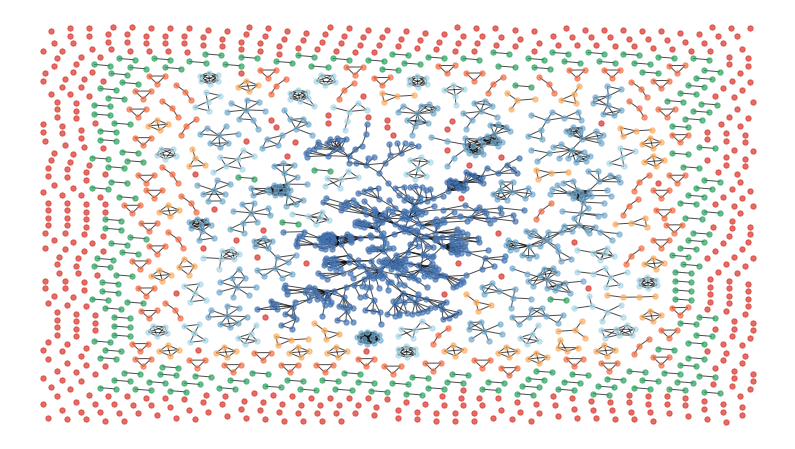

In [26]:
plot_G(G, figure_path)

Lets isolate the Giant and 'Second Giant' (?) components and visualise them:

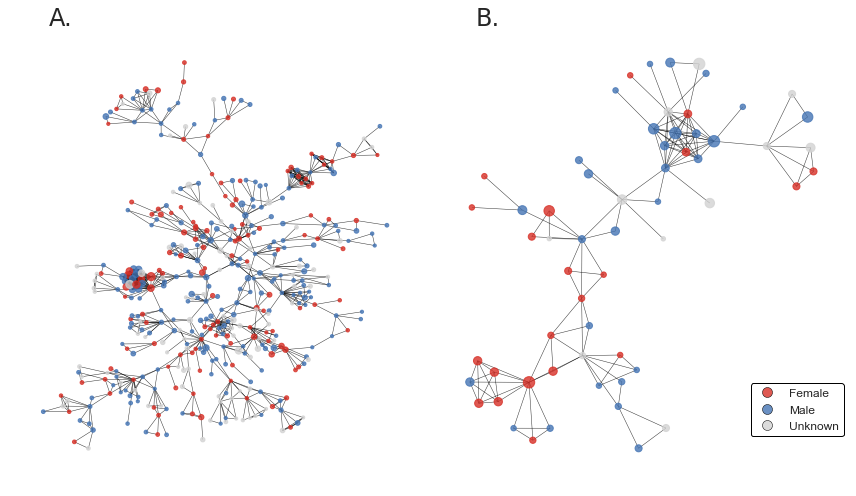

In [27]:
plot_G0_and_G1(G, authors_df, author_papers, figure_path)

Finally, print out some summary statistics from our network:

In [28]:
network_summary(G, Gcc)

Edges in entire network: 2317
Nodes in entire network: 2026
Density of entire network: 0.0011295138508037488
Edges in Giant Component: 926
Nodes in Giant Component: 433
Density of Giant Component: 0.009900778376528955


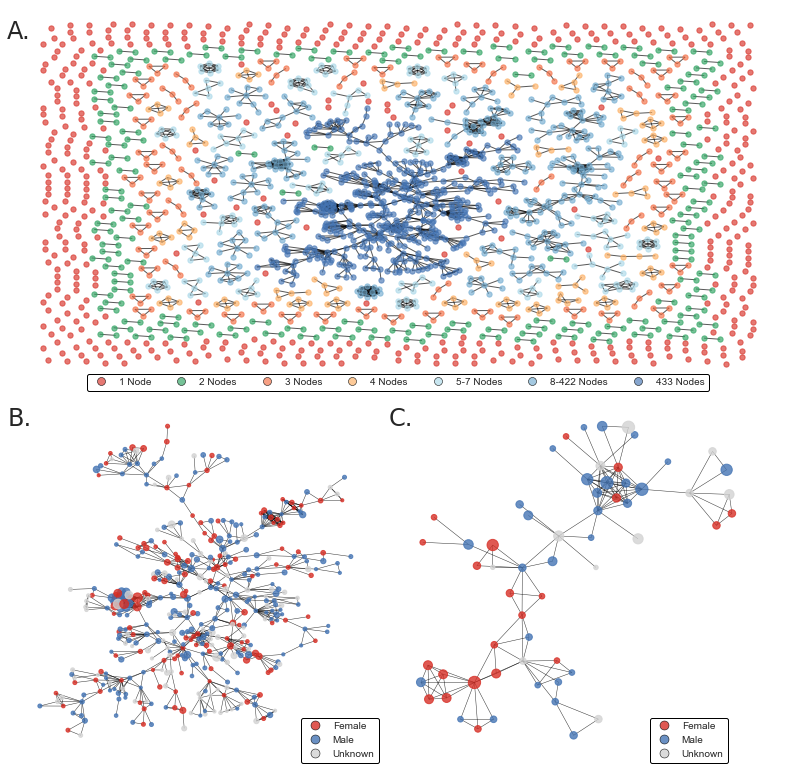

In [29]:
plot_all_G(G, authors_df, author_papers, figure_path)

In [30]:
authors_df.sort_values(by='degree', ascending=False)[0:10]

,authorid,indexed_name,degree,degree_cent,degree_bet
97,7.004308e+09,ZABA B.,28,0.013827,0.005188
98,2.295622e+10,MARSTON M.,23,0.011358,0.001063
1983,7.202992e+09,POTTER R.G.,19,0.009383,0.004498
429,7.402618e+09,HILL K.,19,0.009383,0.010071
93,2.653821e+10,RENIERS G.,19,0.009383,0.000628
1482,7.006608e+09,TRUSSELL J.,19,0.009383,0.021543
1774,7.202527e+09,FREEDMAN R.,18,0.008889,0.005925
100,5.535031e+10,KABUDULA C.,17,0.008395,0.000000
85,6.602861e+09,NALUGODA F.,17,0.008395,0.000000
84,5.631804e+10,NABUKALU D.,17,0.008395,0.000000


#### 3.8 LDA

In [31]:
mallet_topics_abs = make_mallet_model(main_df, d_path, stop, 'clean_abstract', 20)

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 1708
total tokens: 645513
<10> LL/token: -8.48633
<20> LL/token: -7.83541
<30> LL/token: -7.61157
<40> LL/token: -7.50144

0	2.5	marriage age cohort woman marital men married increase period proportion early year nuptiality duration young trend born rise marry late 
1	2.5	model test function propose emigration united series age standard parameter immigrant present base britain distribution developed system immigration fit set 
2	2.5	abortion period register parish england sterilization conclusion year induced interest maternity war continued pre control wale population increase city number 
3	2.5	fertility rural decline urban family control differential area transition marital size catholic parity difference religious ideal rapid birth limitation traditional 
4	2.5	migration behaviour migrant individual demographic decision process social black white national research move base intention role human context c

<150> LL/token: -7.31061
<160> LL/token: -7.30481
<170> LL/token: -7.29985
<180> LL/token: -7.30075
<190> LL/token: -7.2936

0	2.5	marriage woman age cohort men marital married proportion divorce increase year young born early duration nuptiality rise period marry cohabitation 
1	2.5	model test series function base approach propose age present standard apply parameter distribution empirical schedule alternative set framework regression application 
2	2.5	england abortion wale register parish period occupation sterilization general year induced maternity comparison report social conclusion city check source failure 
3	2.5	fertility decline rural urban control differential transition area marital family catholic parity religious difference ideal urbanization variation consistent limitation church 
4	2.5	migration behaviour migrant individual process cross decision white research demographic black united social experience national context move role understand multi 
5	2.5	income populatio

<300> LL/token: -7.27132
<310> LL/token: -7.27345
<320> LL/token: -7.27212
<330> LL/token: -7.27237
<340> LL/token: -7.27073

0	2.5	marriage woman age cohort men marital married proportion divorce increase year early nuptiality duration young born period marry rise cohabitation 
1	2.5	model test method present base apply approach function propose series application procedure distribution standard parameter assumption bias estimation schedule regression 
2	2.5	england abortion wale century register parish occupation period general english year number maternity induced compare social city check comparison town 
3	2.5	fertility decline rural urban transition differential control area marital catholic parity religious difference consistent ratio urbanization complete behaviour variation church 
4	2.5	migration behaviour migrant individual decision process white black cross social demographic experience move national event understand united multi base research 
5	2.5	income measure populati

<460> LL/token: -7.2627
<470> LL/token: -7.2614
<480> LL/token: -7.26148
<490> LL/token: -7.26249

0	2.5	marriage woman age cohort marital married men proportion divorce increase year nuptiality young born duration period early marry rise cohabitation 
1	2.5	model method test apply present base approach propose procedure function series application parameter standard distribution estimation bias regression schedule assumption 
2	2.5	england century wale abortion register parish occupation period general comparison index year compare section nineteenth english induced early record conclusion 
3	2.5	fertility decline rural urban transition differential control area marital catholic parity ratio religious difference complete consistent behaviour church progression fall 
4	2.5	migration behaviour migrant individual decision process white cross black demographic measure move social base national multi event united network highly 
5	2.5	income distribution measure population term long period

<600> LL/token: -7.25394
<610> LL/token: -7.25474
<620> LL/token: -7.25532
<630> LL/token: -7.25425
<640> LL/token: -7.25511

0	2.5	marriage woman age cohort marital married proportion divorce men increase year early nuptiality duration born young marry period number couple 
1	2.5	model method test base present apply propose approach series function application parameter projection standard procedure estimation distribution developed assumption set 
2	2.5	century england nineteenth wale parish period early register eighteenth abortion twentieth occupation general late record number year english source check 
3	2.5	fertility decline rural urban transition differential marital area control catholic parity ratio difference religious behaviour reproductive complete fall substantial church 
4	2.5	migration behaviour migrant individual process decision white cross black social measure move united highly national base multi internal intention research 
5	2.5	income distribution measure long t

<760> LL/token: -7.25124
<770> LL/token: -7.25025
<780> LL/token: -7.2501
<790> LL/token: -7.25138

0	2.5	marriage woman age cohort marital married proportion divorce men increase year young nuptiality born duration early marry number period couple 
1	2.5	model method test base apply approach propose present function series application projection procedure parameter estimation standard distribution assumption developed regression 
2	2.5	century england nineteenth wale period early register parish eighteenth twentieth demographic late record occupation general english half year number source 
3	2.5	fertility decline rural urban transition differential marital area control parity catholic difference religious ratio fall complete behaviour urbanization consistent reduction 
4	2.5	migration behaviour migrant individual process decision white cross black social measure move base national intention internal highly event network multi 
5	2.5	income distribution measure term long population in

<900> LL/token: -7.24861
<910> LL/token: -7.25045
<920> LL/token: -7.24854
<930> LL/token: -7.24921
<940> LL/token: -7.2494

0	2.5	marriage woman age cohort marital married proportion divorce increase men year duration nuptiality young born early marry period number cohabitation 
1	2.5	model method test present base apply propose approach projection series function application parameter procedure standard estimation technique distribution developed bias 
2	2.5	century england nineteenth period wale early register parish eighteenth late demographic twentieth record occupation half source time main year english 
3	2.5	fertility decline rural urban transition differential marital area control parity catholic complete religious difference ratio substantial fall urbanization behaviour reduction 
4	2.5	migration behaviour individual migrant process decision cross white social black measure move experience national base intention internal network research multi 
5	2.5	income distribution term

[(0, '0.138*"marriage" + 0.070*"woman" + 0.058*"age" + 0.042*"cohort" + 0.029*"marital" + 0.027*"married" + 0.025*"proportion" + 0.023*"men" + 0.023*"divorce" + 0.020*"increase"'), (1, '0.109*"model" + 0.037*"method" + 0.022*"test" + 0.015*"base" + 0.014*"present" + 0.014*"propose" + 0.014*"apply" + 0.012*"approach" + 0.012*"series" + 0.011*"function"'), (2, '0.069*"century" + 0.030*"england" + 0.027*"nineteenth" + 0.022*"period" + 0.020*"wale" + 0.019*"early" + 0.016*"parish" + 0.016*"register" + 0.015*"eighteenth" + 0.014*"twentieth"'), (3, '0.340*"fertility" + 0.053*"decline" + 0.041*"urban" + 0.041*"rural" + 0.025*"transition" + 0.022*"differential" + 0.017*"marital" + 0.016*"area" + 0.015*"control" + 0.010*"parity"'), (4, '0.069*"migration" + 0.029*"behaviour" + 0.027*"migrant" + 0.023*"individual" + 0.018*"process" + 0.016*"decision" + 0.015*"cross" + 0.014*"white" + 0.012*"black" + 0.012*"social"'), (5, '0.055*"income" + 0.034*"distribution" + 0.034*"measure" + 0.034*"term" + 0.

In [32]:
mallet_topics_tit = make_mallet_model(main_df, d_path, stop, 'Title', 20)

Mallet LDA: 20 topics, 5 topic bits, 11111 topic mask
Data loaded.
max tokens: 88
total tokens: 49809
<10> LL/token: -7.31934
<20> LL/token: -6.54199
<30> LL/token: -6.35494
<40> LL/token: -6.29985

0	2.5	population growth policy southern regional problem test nigeria aspect stable hospital scotland costa outcome ireland rica government require perception micro 
1	2.5	model cohort fertility reproductive behaviour variation indian cycle finland versus review component republic peasant pressure plague random political peopleâ pakistan 
2	2.5	child life health india estimation development expectancy historical service care israel reply indirect context orphanhood empirical occupation prevalence cluster malthus 
3	2.5	england decline wale africa south village abortion famine asia elderly force investigation type jew article parameter couple dependency decomposition father 
4	2.5	age marriage census distribution comparison childhood breastfeeding limitation space developed longevity charact


0	2.5	population growth policy southern problem nigeria general stable swedish hospital costa restrict accuracy rica government momentum assess brassâ balance semi 
1	2.5	model cohort reproductive behaviour variation indian german finland probability review versus thailand republic couple pressure simulation adolescent italy plague random 
2	2.5	child life health india estimation development historical expectancy service care indirect context orphanhood occupation cluster progress expectation arab mothersâ panel 
3	2.5	england decline wale africa south village abortion comment famine asia elderly reply investigation jew component article ireland dependency decomposition height 
4	2.5	age marriage census distribution comparison childhood breastfeeding limitation developed longevity system characteristic hong enumeration fecundability secular hazard reconstruction kong event 
5	2.5	economic century status nineteenth socio divorce cross mobility experience eighteenth saharan national sch

<370> LL/token: -6.1103
<380> LL/token: -6.11407
<390> LL/token: -6.11057

0	2.5	population growth policy southern problem nigeria local general stable swedish hospital costa restrict rica government voluntary balance improvement intrinsic accuracy 
1	2.5	model cohort reproductive behaviour variation indian village indonesia german probability review inter thailand republic simulation plague random peopleâ incidence micro 
2	2.5	child life health india estimation historical development expectancy service care parent indirect context orphanhood forecasting occupation cluster progress modernization expectation 
3	2.5	england decline wale africa south saharan abortion comment famine asia elderly reply investigation jew component article human exposure dependency decomposition 
4	2.5	age marriage census distribution comparison childhood limitation developed longevity increase characteristic hong enumeration fecundability secular hazard reconstruction kong event sterility 
5	2.5	economic ce

<590> LL/token: -6.0974

0	2.5	population growth policy southern problem nigeria local general stationary stable swedish hospital costa restrict rica voluntary assess balance semi intrinsic 
1	2.5	model cohort reproductive behaviour variation indian village indonesia german decision probability review inter gender island republic couple choice simulation random 
2	2.5	child life health india maternal estimation development historical expectancy service care parent indirect context orphanhood occupation girl cluster expectation lesson 
3	2.5	england decline wale africa south saharan abortion comment famine asia elderly reply jew city component article human investigation exposure ireland 
4	2.5	age marriage census distribution comparison childhood limitation increase longevity developed characteristic hong enumeration secular hazard reconstruction kong event sterility pension 
5	2.5	economic century status nineteenth socio divorce cross mobility experience eighteenth national measure sc

<700> LL/token: -6.09336
<710> LL/token: -6.09311
<720> LL/token: -6.0859
<730> LL/token: -6.08761
<740> LL/token: -6.08921

0	2.5	population growth policy southern problem nigeria local general stationary stable hospital swedish costa restrict rica voluntary english balance semi intrinsic 
1	2.5	model cohort reproductive behaviour variation indian village research indonesia decision german probability review inter gender context island link republic couple 
2	2.5	child life health india estimation maternal development expectancy service care parent indirect orphanhood occupation girl cluster modernization expectation arab panel 
3	2.5	england decline wale africa south saharan abortion comment famine asia elderly reply investigation city jew component article human exposure ireland 
4	2.5	age marriage census distribution comparison childhood limitation developed longevity characteristic hong enumeration secular increase reconstruction profile accuracy hazard kong event 
5	2.5	economic 

<920> LL/token: -6.08617
<930> LL/token: -6.08479
<940> LL/token: -6.08376

0	2.5	population growth policy southern problem nigeria local general stationary stable hospital swedish costa restrict rica voluntary english assess balance intrinsic 
1	2.5	model cohort base reproductive behaviour variation indian village process research indonesia german decision probability inter gender context island link republic 
2	2.5	child life health india education maternal estimation development expectancy service care parent indirect orphanhood occupation girl cluster matter expectation mothersâ 
3	2.5	england decline wale africa south saharan abortion comment famine asia elderly reply investigation jew component city article human exposure dependency 
4	2.5	age marriage census distribution comparison childhood limitation longevity characteristic hong enumeration increase secular accuracy profile decomposition kong event index sterility 
5	2.5	economic century status nineteenth socio divorce cross 

[(0, '0.425*"population" + 0.082*"growth" + 0.057*"policy" + 0.031*"southern" + 0.022*"problem" + 0.019*"nigeria" + 0.017*"local" + 0.016*"general" + 0.015*"stable" + 0.015*"stationary"'), (1, '0.130*"model" + 0.081*"cohort" + 0.052*"base" + 0.046*"reproductive" + 0.042*"behaviour" + 0.037*"variation" + 0.033*"indian" + 0.032*"village" + 0.028*"process" + 0.025*"research"'), (2, '0.206*"child" + 0.147*"life" + 0.080*"health" + 0.056*"india" + 0.048*"education" + 0.042*"maternal" + 0.042*"estimation" + 0.039*"development" + 0.037*"expectancy" + 0.023*"service"'), (3, '0.163*"england" + 0.129*"decline" + 0.079*"wale" + 0.068*"africa" + 0.050*"south" + 0.036*"saharan" + 0.031*"abortion" + 0.029*"comment" + 0.022*"famine" + 0.020*"asia"'), (4, '0.238*"age" + 0.166*"marriage" + 0.077*"census" + 0.052*"distribution" + 0.036*"comparison" + 0.032*"childhood" + 0.024*"limitation" + 0.020*"longevity" + 0.016*"characteristic" + 0.013*"hong"'), (5, '0.154*"economic" + 0.136*"century" + 0.102*"stat

In [33]:
mallet_topics_abs.to_csv(os.path.join(os.getcwd(), '..', 'mallet_topics_abs.csv'))

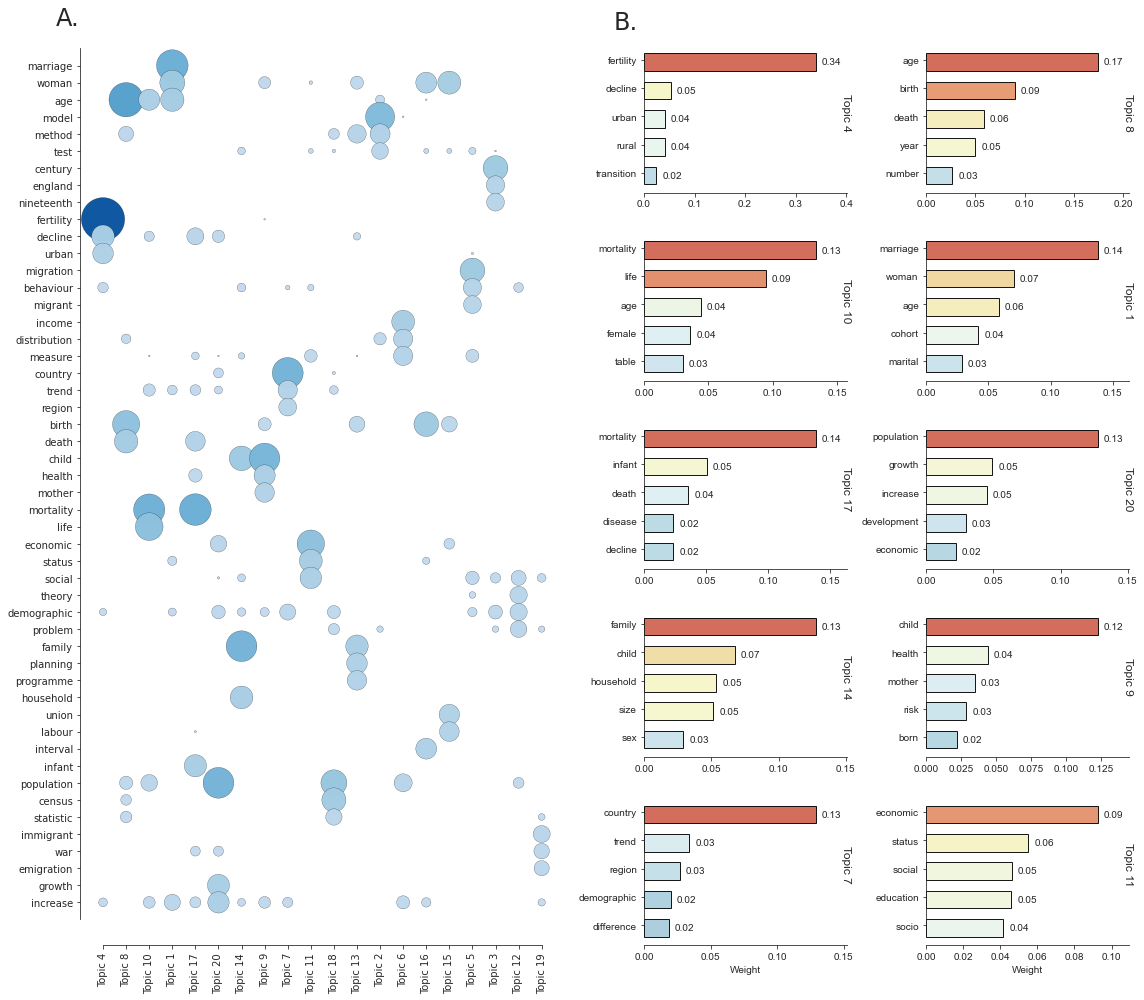

In [34]:
mallet_topics_abs = pd.read_csv('mallet_topics_abs.csv', index_col=0)
visualise_mallet(mallet_topics_abs)

     number_articles number_oa percent_OA
1947              16         0        0.0
1948              22         0        0.0
1949              24         0        0.0
1950              33         0        0.0
1951              19         0        0.0
...              ...       ...        ...
2016              22         4  18.181818
2017              27         9  33.333333
2018              24         8  33.333333
2019              26         8  30.769231
2020              39        18  46.153846

[74 rows x 3 columns]


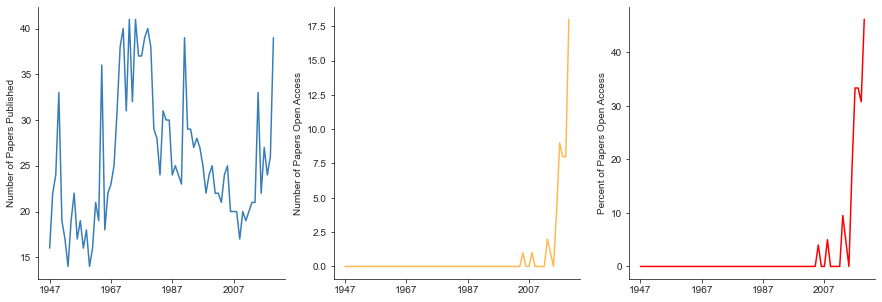

In [35]:
open_access_analysis(main_df, figure_path)

127
     number_articles number_uncited percent_uncited
1947              15              1        6.666667
1948              21              5       23.809524
1949              22              4       18.181818
1950              31              8       25.806452
1951              18              3       16.666667
...              ...            ...             ...
2016              21              1        4.761905
2017              26              1        3.846154
2018              24              2        8.333333
2019              26              8       30.769231
2020              39             26       66.666667

[73 rows x 3 columns]


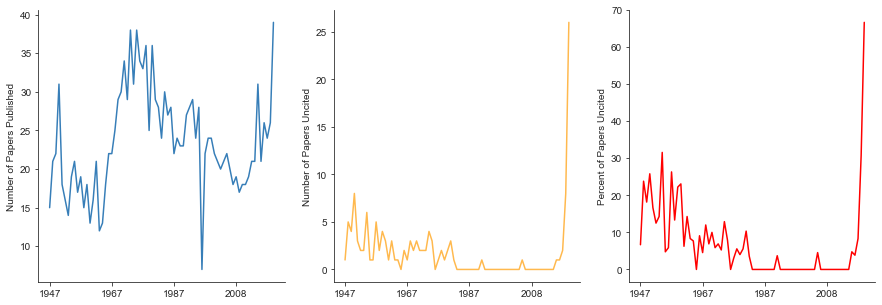

In [36]:
pd.set_option('mode.chained_assignment', None)
main_df_noabs = main_df[main_df['abstract'].str.len()>5]
main_df_noabs['year'] = main_df_noabs.copy(deep=True).Date.str.extract(r'([0-9][0-9][0-9][0-9])',
                                                 expand=True)
main_df_noabs
uncited_count = uncited_papers(main_df_noabs, figure_path)
print(uncited_count)

In [37]:
topic_list = ['1a', '1b', '2a', '2b', '2c', '3a', '3b', '3c',
              '4a', '4b', '4c', '5a', '6a', '6b', '6c', '7a']
uncited_ratios(main_df, topic_list)

   number_papers uncited uncited_ratio
2b           100       2          0.02
6a           165       5      0.030303
6c            31       1      0.032258
4a           114       5       0.04386
4c           260      12      0.046154
2a           181      10      0.055249
3c            18       1      0.055556
1a           414      29      0.070048
4b           164      12      0.073171
6b           108       9      0.083333
1b           256      22      0.085938
5a           260      26           0.1
2c           102      11      0.107843
3a            90      10      0.111111
3b             6       1      0.166667
7a            84      19       0.22619


In [38]:
uncited_ratios(main_df_noabs, topic_list)

   number_papers uncited uncited_ratio
2b           100       2          0.02
6a           165       5      0.030303
6c            31       1      0.032258
4a           114       5       0.04386
4c           260      12      0.046154
2a           181      10      0.055249
3c            18       1      0.055556
1a           413      29      0.070218
4b           164      12      0.073171
6b           108       9      0.083333
1b           256      22      0.085938
3a            90       9           0.1
5a           260      26           0.1
2c           102      11      0.107843
3b             6       1      0.166667
7a            84      18      0.214286


In [39]:
topic_list = range(1,8)
uncited_ratios(main_df, topic_list)

  number_papers uncited uncited_ratio
6           290      13      0.044828
4           520      29      0.055769
2           374      23      0.061497
1           663      51      0.076923
5           260      26           0.1
3           113      12      0.106195
7            84      19       0.22619


In [40]:
uncited_ratios(main_df_noabs, topic_list)

  number_papers uncited uncited_ratio
6           290      13      0.044828
4           520      29      0.055769
2           374      23      0.061497
1           662      51      0.077039
3           113      11      0.097345
5           260      26           0.1
7            84      18      0.214286
